# (f)MRI processing using Nilearn

*IMPRS - Using Python for Cognitive Science (2022). This tutorial is based on several [Nilearn](https://nilearn.github.io/stable/index.html) tutorials and work by [Lukas Snoek](https://lukas-snoek.com/)*

Good morning! Today we will be working through this tutorial to get familiar with the processing of (BOLD)MRI data in Python using *Nilearn*. Nilearn is a package that provides tools for analyses such as functional connectivity, multivariate (machine-learning based) decoding, but also more basic tools like image manipulation and visualization.  

At the end of this tutorial you'll know
- How to read in (BOLD)MRI data
- How to visualize brain images (make pretty brain plots)
- How to manipulate brain image volumes (resampling, smoothing, masking, ROIs)
- How to extract data from regions of interest
- (if time permits) how to implement connectivity analyses 

Disclaimer: This tutorial is intended to increase your Python skills while working with fMRI data and does not cover all fMRI preprocessing steps (!). It also does not cover the statistical and machine-learning tools that Nilearn provides. 




In [17]:
# For people who forgot to install nilearn 
#import sys
#!{sys.executable} -m pip install nilearn

## 0. Importing modules

Today, we will need os, NumPy, matplotlib, and some modules from nilearn (`datasets`, `plotting`, `image`)

<font color='green'>**Exercise 1:**</font> Import them below. We have added matplotlib for you already.  

In [1]:
import matplotlib.pyplot as plt

### your code here
# from nilearn import 


## 1. Reading in data

#### 1.1 File format 

Nilearn's functionality implicitly assumes that your MRI data is stored in nifti images. In nilearn, they often use the term “niimg” as abbreviation that denotes either a file name or a NiftiImage object (Nilearn can operate on either file names or NiftiImage objects). Niimgs can be 3D or 4D. A 4D niimg may for instance represent a time series of 3D images. It can be a list of file names, if these contain 3D information. For more info about data formats in Nilearn, see [here](https://nilearn.github.io/manipulating_images/input_output.html).

Let's now get an example dataset. There are many datasets available on openneuro, osf etc. If you want, feel free to get a dataset (one participant) that you find interesting! Note that different datasets are often saved in different ways and formats (which system was used, how files were exported etc), so you might run in to some 'problems' later in this tutorial (but we are happy to help with those issues). Fortunately, Nilearn provides dataset fetching function that automatically downloads reference datasets and atlases. They can be imported from [`nilearn.datasets`](https://nilearn.github.io/modules/reference.html#module-nilearn.datasets)

Here we will use [`nilearn.datasets.fetch_haxby`](https://nilearn.github.io/modules/generated/nilearn.datasets.fetch_haxby.html) to load the data from this paper by [Haxby et al (2001)](https://www.science.org/doi/10.1126/science.1063736). This dataset contains results from a classical fMRI study that investigated the differences between the neural correlates of face versus object processing in the ventral visual stream. Face and object stimuli showed widely distributed and overlapping
response patterns:

Let's load the data using the default settings (note that this may take a while):

In [2]:
haxby_dataset = datasets.fetch_haxby()

<font color='green'>**Exercise 2:**</font> While the data is downloading, have a look at the Nilearn website to see what is possible or have a look at the Haxby paper to see what data we're dealing with. 

Fetching the Haxby dataset using `fetch_haxby()` returns a data structure that contains different pieces of information on the retrieved dataset, including the file names on hard disk:


In [5]:
haxby_dataset

{'anat': ['C:\\Users\\noors/nilearn_data\\haxby2001\\subj2\\anat.nii.gz'],
 'func': ['C:\\Users\\noors/nilearn_data\\haxby2001\\subj2\\bold.nii.gz'],
 'session_target': ['C:\\Users\\noors/nilearn_data\\haxby2001\\subj2\\labels.txt'],
 'mask_vt': ['C:\\Users\\noors/nilearn_data\\haxby2001\\subj2\\mask4_vt.nii.gz'],
 'mask_face': ['C:\\Users\\noors/nilearn_data\\haxby2001\\subj2\\mask8b_face_vt.nii.gz'],
 'mask_house': ['C:\\Users\\noors/nilearn_data\\haxby2001\\subj2\\mask8b_house_vt.nii.gz'],
 'mask_face_little': ['C:\\Users\\noors/nilearn_data\\haxby2001\\subj2\\mask8_face_vt.nii.gz'],
 'mask_house_little': ['C:\\Users\\noors/nilearn_data\\haxby2001\\subj2\\mask8_house_vt.nii.gz'],
 'mask': 'C:\\Users\\noors/nilearn_data\\haxby2001\\mask.nii.gz',
 'description': 'Haxby 2001 results\n\n\nNotes\n-----\nResults from a classical fMRI study that investigated the differences between\nthe neural correlates of face versus object processing in the ventral visual\nstream. Face and object stimul

Look at the folder on your computer and check out the different files. 

<font color='green'>**Exercise 3:**</font> Why was the data from subject 2 downloaded? How would you download the data from another participant? (Hint: look at the fetch_haxby function)

In [108]:
###  You can try it out, but don't worry if it takes too long (just think about it!)

Explanation and further resources of the dataset at hand can be retrieved as follows:

In [4]:
print(haxby_dataset.description)  

Haxby 2001 results


Notes
-----
Results from a classical fMRI study that investigated the differences between
the neural correlates of face versus object processing in the ventral visual
stream. Face and object stimuli showed widely distributed and overlapping
response patterns.

Content
-------
The "simple" dataset includes
    :'func': Nifti images with bold data
    :'session_target': Text file containing session data
    :'mask': Nifti images with employed mask
    :'session': Text file with condition labels


The full dataset additionally includes
    :'anat': Nifti images with anatomical image
    :'func': Nifti images with bold data
    :'mask_vt': Nifti images with mask for ventral visual/temporal cortex
    :'mask_face': Nifti images with face-reponsive brain regions
    :'mask_house': Nifti images with house-reponsive brain regions
    :'mask_face_little': Spatially more constrained version of the above
    :'mask_house_little': Spatially more constrained version of the abov

As you can see, this Haxby dataset has an anatomical image, functional images and masks. Let's load the anatomical and functional data:

In [6]:
fmri_filename = haxby_dataset.func[0]
anat_filename = haxby_dataset.anat[0]

# print basic information on the dataset
print('First subject functional nifti images (4D) are at: %s' %
      fmri_filename)  # 4D data
print('First subject anatomical nifti images (3D) are at: %s' %
      anat_filename)  # 3D data

First subject functional nifti images (4D) are at: C:\Users\noors/nilearn_data\haxby2001\subj2\bold.nii.gz
First subject anatomical nifti images (3D) are at: C:\Users\noors/nilearn_data\haxby2001\subj2\anat.nii.gz


#### 1.2 Headers

The header of an image contains the image metadata. The information in the header will differ between different image formats. For example, the header information for a NIfTI1 format file differs from the header information for a MINC format file.

Our image is a NIfTI1 format image, and it therefore has a NIfTI1 format header:

In [7]:
img_func = nib.load(fmri_filename)
img_anat = nib.load(anat_filename)

## get the header of the functional scan: 
header = img_func.header
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [   4   40   64   64 1452    1    1    1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.   3.5  3.75 3.75 2.5  0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 1578.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL4.0'
aux_file        : b''
qform_code      : unknown
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [0. 

The header of any image will normally have the following methods:

- `get_data_shape()` to get the output shape of the image data array:
- `get_data_dtype()` to get the numpy data type in which the image data is stored (or will be stored if you save the image):
- `get_zooms()` to get the voxel sizes in millimeters: The fourth value of header.get_zooms() is the time between scans in milliseconds; this is the equivalent of voxel size on the time axis.

<font color='green'>**Exercise 4:**</font> For the functional data, get the voxel sizes in millimeters and the time between scans in milliseconds. 

In [76]:
## your code here


(40, 64, 64, 1452)
int16
(3.5, 3.75, 3.75, 2.5)


<font color='green'>**Exercise 5:**</font> Now do the same for the anatomical scan! What differences do you notice? Why is this the case?

In [77]:
### your code here, note that you first need to get the header from anat_filename


### 2. Visualization of brain images

Nilearn has several plotting tools, such as `plotting.plot_anat` for plotting anatomical images (https://nilearn.github.io/stable/auto_examples/01_plotting/plot_demo_plotting.html#sphx-glr-auto-examples-01-plotting-plot-demo-plotting-py) 

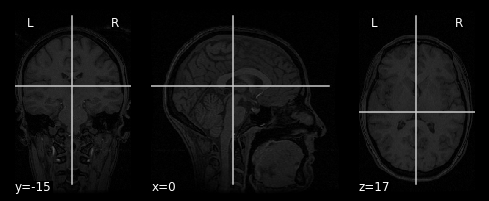

In [80]:
plotting.plot_anat(anat_filename)

It is possible to alter the default annotations of plots, using the method `annotate` of the display objects. For example, we can add a scale bar at the bottom right of each view and indicate which coordinates we want to see:



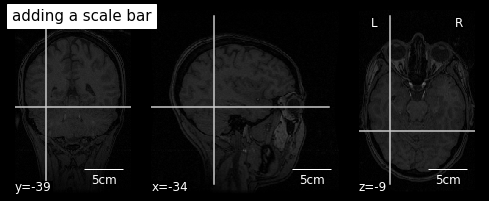

In [79]:
display = plotting.plot_anat(anat_filename,
                             title="adding a scale bar",
                             cut_coords=[-34, -39, -9])
display.annotate(scalebar=True)

Nilearn plotting functions contain many (optional) arguments that you can use to customize your plot. For example, the display_mode argument allows you to plot the image in one (or more) particular dimensions (e.g., the "X" axis, which is usually sagittal) and the cut_coords argument allows you to specify the number (if integer) or locations of the particular slices/cuts (if list):

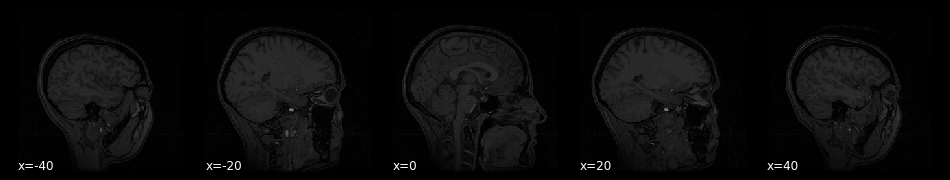

In [82]:
display = plotting.plot_anat(anat_filename, display_mode='x', cut_coords=[-40, -20, 0, 20, 40])


That looks nice! But what if we want to show certain slices from the different dimensions in one plot? We can write our own function: 

Text(0.5, 0.98, 'Some slices for anatomical image')

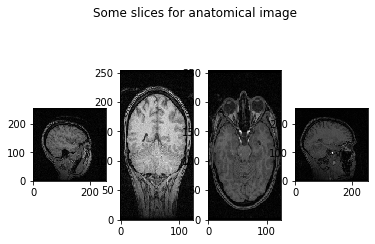

In [15]:
## here we use nibabel to load the data into an array
import nibabel as nib
anat_img_data = nib.load(anat_filename).get_fdata()

def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = anat_img_data[28, :, :]
slice_1 = anat_img_data[:, 83, :]
slice_2 = anat_img_data[:, :, 118]
slice_3 = anat_img_data[44, :, :]
show_slices([slice_0, slice_1, slice_2, slice_3])
plt.suptitle("Some slices for anatomical image")  

Using `plotting.plot_roi` we can visualize specific regions of interest (ROIs).


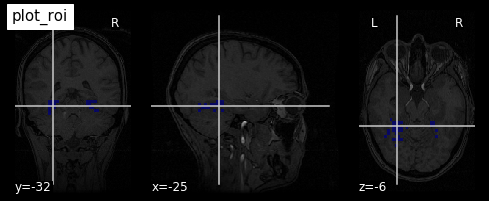

In [108]:
mask_filename = haxby_dataset.mask_house[0]

plotting.plot_roi(mask_filename, bg_img=anat_filename,
                  title="plot_roi")

<font color='purple'>**To think:**</font> What ROI did we plot?


Another tool to plot different slices of a given image is `plotting.plot_img`.

<font color='green'>**Exercise 6:**</font> Use plot_img to visualize the anatomical scan

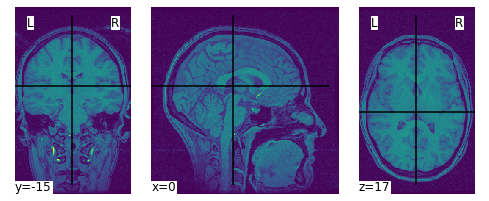

In [81]:
### your code here


Nilearn has a whole section on plotting, with a nice example gallery: https://nilearn.github.io/plotting/index.html

## 3. Manipulating brain image volumes

Nilearn also contains a lot of functionality to easily manipulate images. Note that (like we also saw last week) all of this could be implemented with numpy (in fact, Nilearn uses numpy "under the hood" for many of its operations); just see the Nilearn functions as "wrappers" around common numpy routines for nifti-based arrays (which also handle the updating of image affines, e.g. after resampling an image, appropriately).

To showcase some nilearn functions, we'll use the functional MRI data we loaded before (img_func).

#### 3.1 A better look at functional data
Let's print the shape of our functional data file: 

In [57]:
print("Shape of functional MRI image: %s" % (img_func.shape,))


Shape of functional MRI image: (40, 64, 64, 1452)


This file, however, is quite large, as it contains concatenated data across 12 runs. To limit the amount of data that we need to load into RAM, we'll only load in the data from the first run. We can find out which volumes belong to which run in the "session_target" information.


In [58]:
haxby_dataset.session_target

['C:\\Users\\noors/nilearn_data\\haxby2001\\subj2\\labels.txt']

Let's load this file as a pandas dataframe:

In [107]:
import pandas as pd
import numpy as np
metadata = pd.read_csv(haxby_dataset['session_target'][0], sep=' ')
print("Shape of metadata dataframe: %s" % (metadata.shape,), end='\n\n')
metadata.head(30)

Shape of metadata dataframe: (1452, 2)



labels  chunks
0       rest       0
1       rest       0
2       rest       0
3       rest       0
4       rest       0
5       rest       0
6   scissors       0
7   scissors       0
8   scissors       0
9   scissors       0
10  scissors       0
11  scissors       0
12  scissors       0
13  scissors       0
14  scissors       0
15      rest       0
16      rest       0
17      rest       0
18      rest       0
19      rest       0
20      rest       0
21      face       0
22      face       0
23      face       0
24      face       0
25      face       0
26      face       0
27      face       0
28      face       0
29      face       0

Here, "chunks" refer to the specific run index and "labels" refers to the timepoint-by-timepoint condition (i.e., the condition of the active block at each moment in time, e.g., images of scissors, images of chairs, rest blocks, etc.). Let's compute the number of timepoints in the first "chunk" (run):



In [60]:
nvol_run_1 = np.sum(metadata['chunks'] == 0)
print("Number of timepoints in run 1: %i" % nvol_run_1)

Number of timepoints in run 1: 121


Alright, now we can use Nilearn's `index_img` function from the image module to index our func_img object:

In [61]:
to_index = np.arange(nvol_run_1, dtype=int)
img_func_run1 = image.index_img(img_func, to_index)
print("Shape of func_img_run1: %s" % (img_func_run1.shape,))

Shape of func_img_run1: (40, 64, 64, 121)


<font color='green'>**Exercise 7:**</font> With the information in the header from img_func_run1, can you determine how long (in seconds) the first run lasted?

In [19]:
### your code here 



#### 3.2 Spatial processing

Nilearn also provides some functionality for basic preprocessing of (functional) images. Note the adjective "basic" — most preprocessing steps (such as image registration, motion correction, susceptibility distortion correction, etc.) should be done using other packages (for which we strongly recommend [Fmriprep](https://fmriprep.org/en/stable/?msclkid=e31c4af9d0f811ec86025fc6ef658a67))). That said, Nilearn does provide some preprocessing functionality, such as smoothing (with image.smooth_img).

*Why smoothing?* 
Functional MRI data have a low signal-to-noise ratio. When using methods that are not robust to noise, it is useful to apply a spatial filtering kernel on the data. Such data smoothing is usually applied using a Gaussian function with 4mm to 12mm full-width at half-maximum (this is where the FWHM comes from). The function nilearn.image.smooth_img accounts for potential anisotropy in the image affine (i.e., non-indentical voxel size in all the three dimensions). 


Alright, before we look at smoothing, let's make our data a little simpler. 
Instead of looking at the functional data over time, let's compute the mean across time for every voxel: 

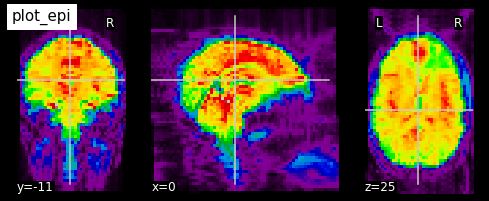

In [62]:
# Compute the voxel_wise mean of functional images across time.
# Basically reducing the functional image from 4D to 3D
mean_haxby_img = image.mean_img(img_func_run1)

# Visualizing mean image (3D)
display = plotting.plot_epi(mean_haxby_img, title="plot_epi")


Now, let's see what happens if we add some smoothing! For this, we can use `image.smooth_img`. 


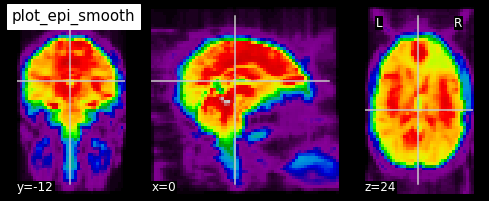

In [63]:
func_smooth = image.smooth_img(mean_haxby_img, fwhm=5)
display = plotting.plot_epi(func_smooth, title = "plot_epi_smooth");

<font color='green'>**Exercise 8:**</font> Try out different smoothing values and plot below:

In [ ]:
### your code here


##### interactive plotting (let's try this time) 
Note that you can even create interactive image viewers using, for example, the view_img function. Importantly (at least in Jupyter notebooks), you should call this plotting function at the end of the code cell and you should not assign the output of the function to a new variable, otherwise the viewer won't render.


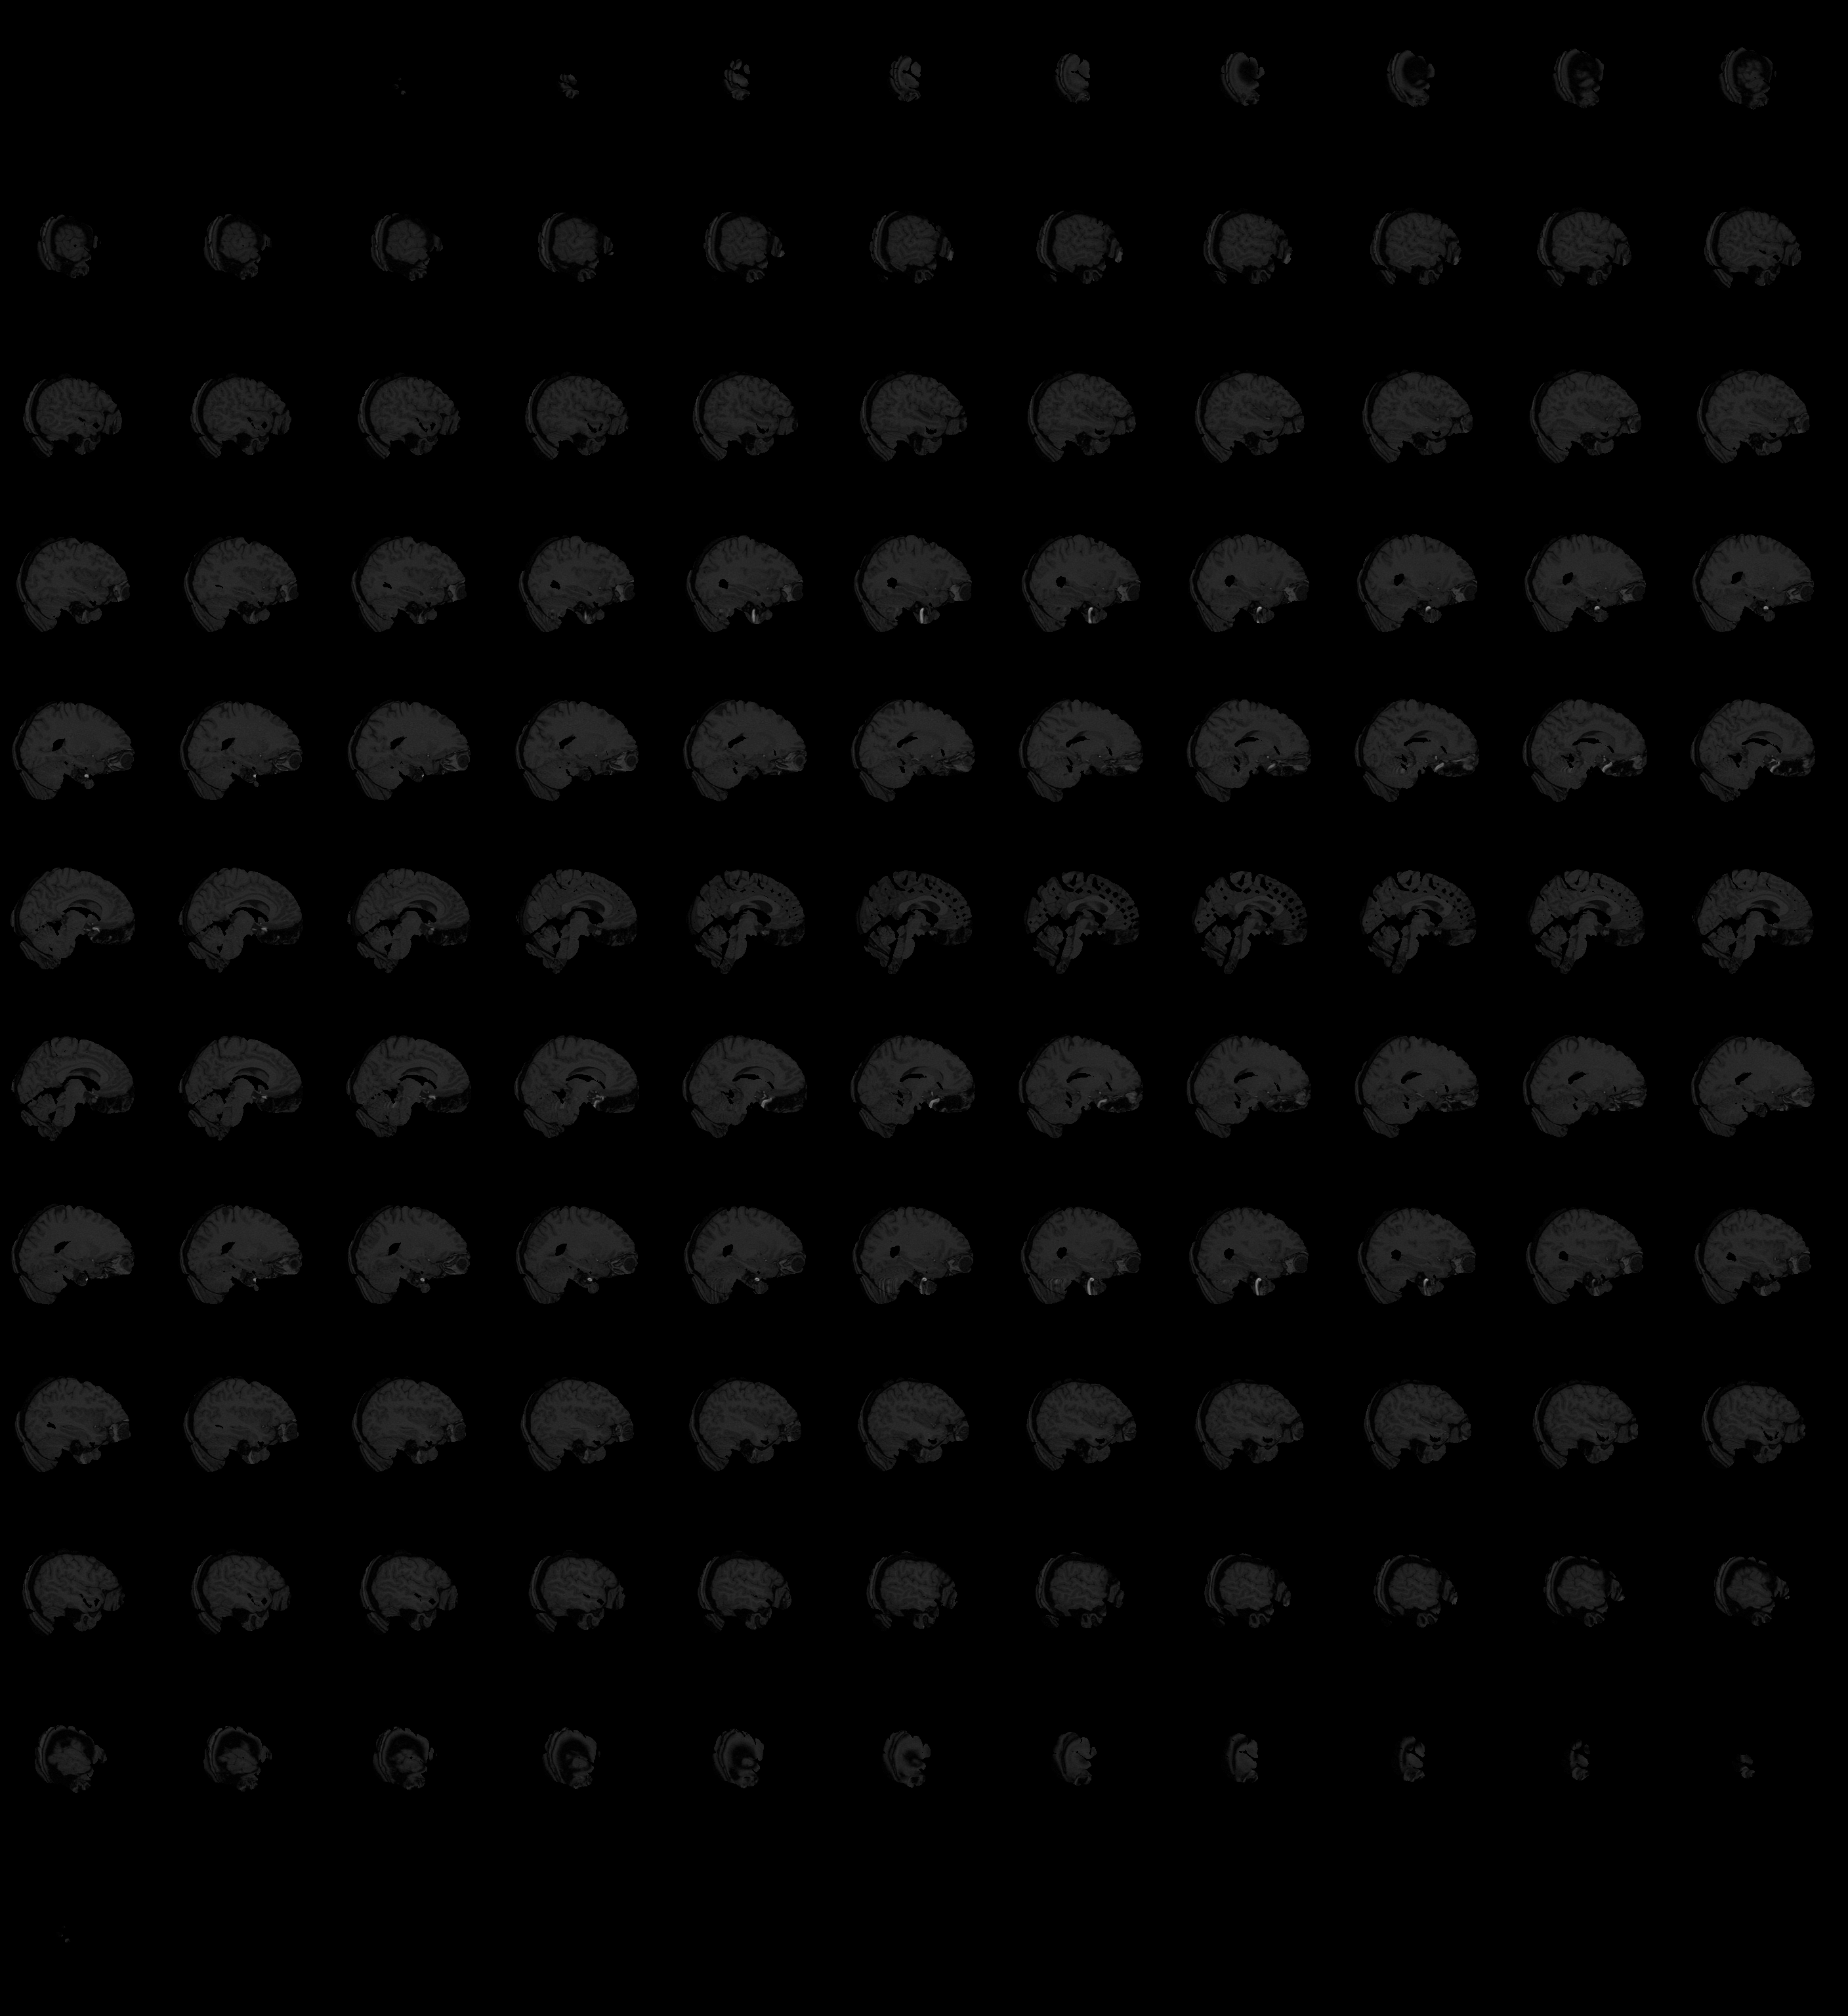
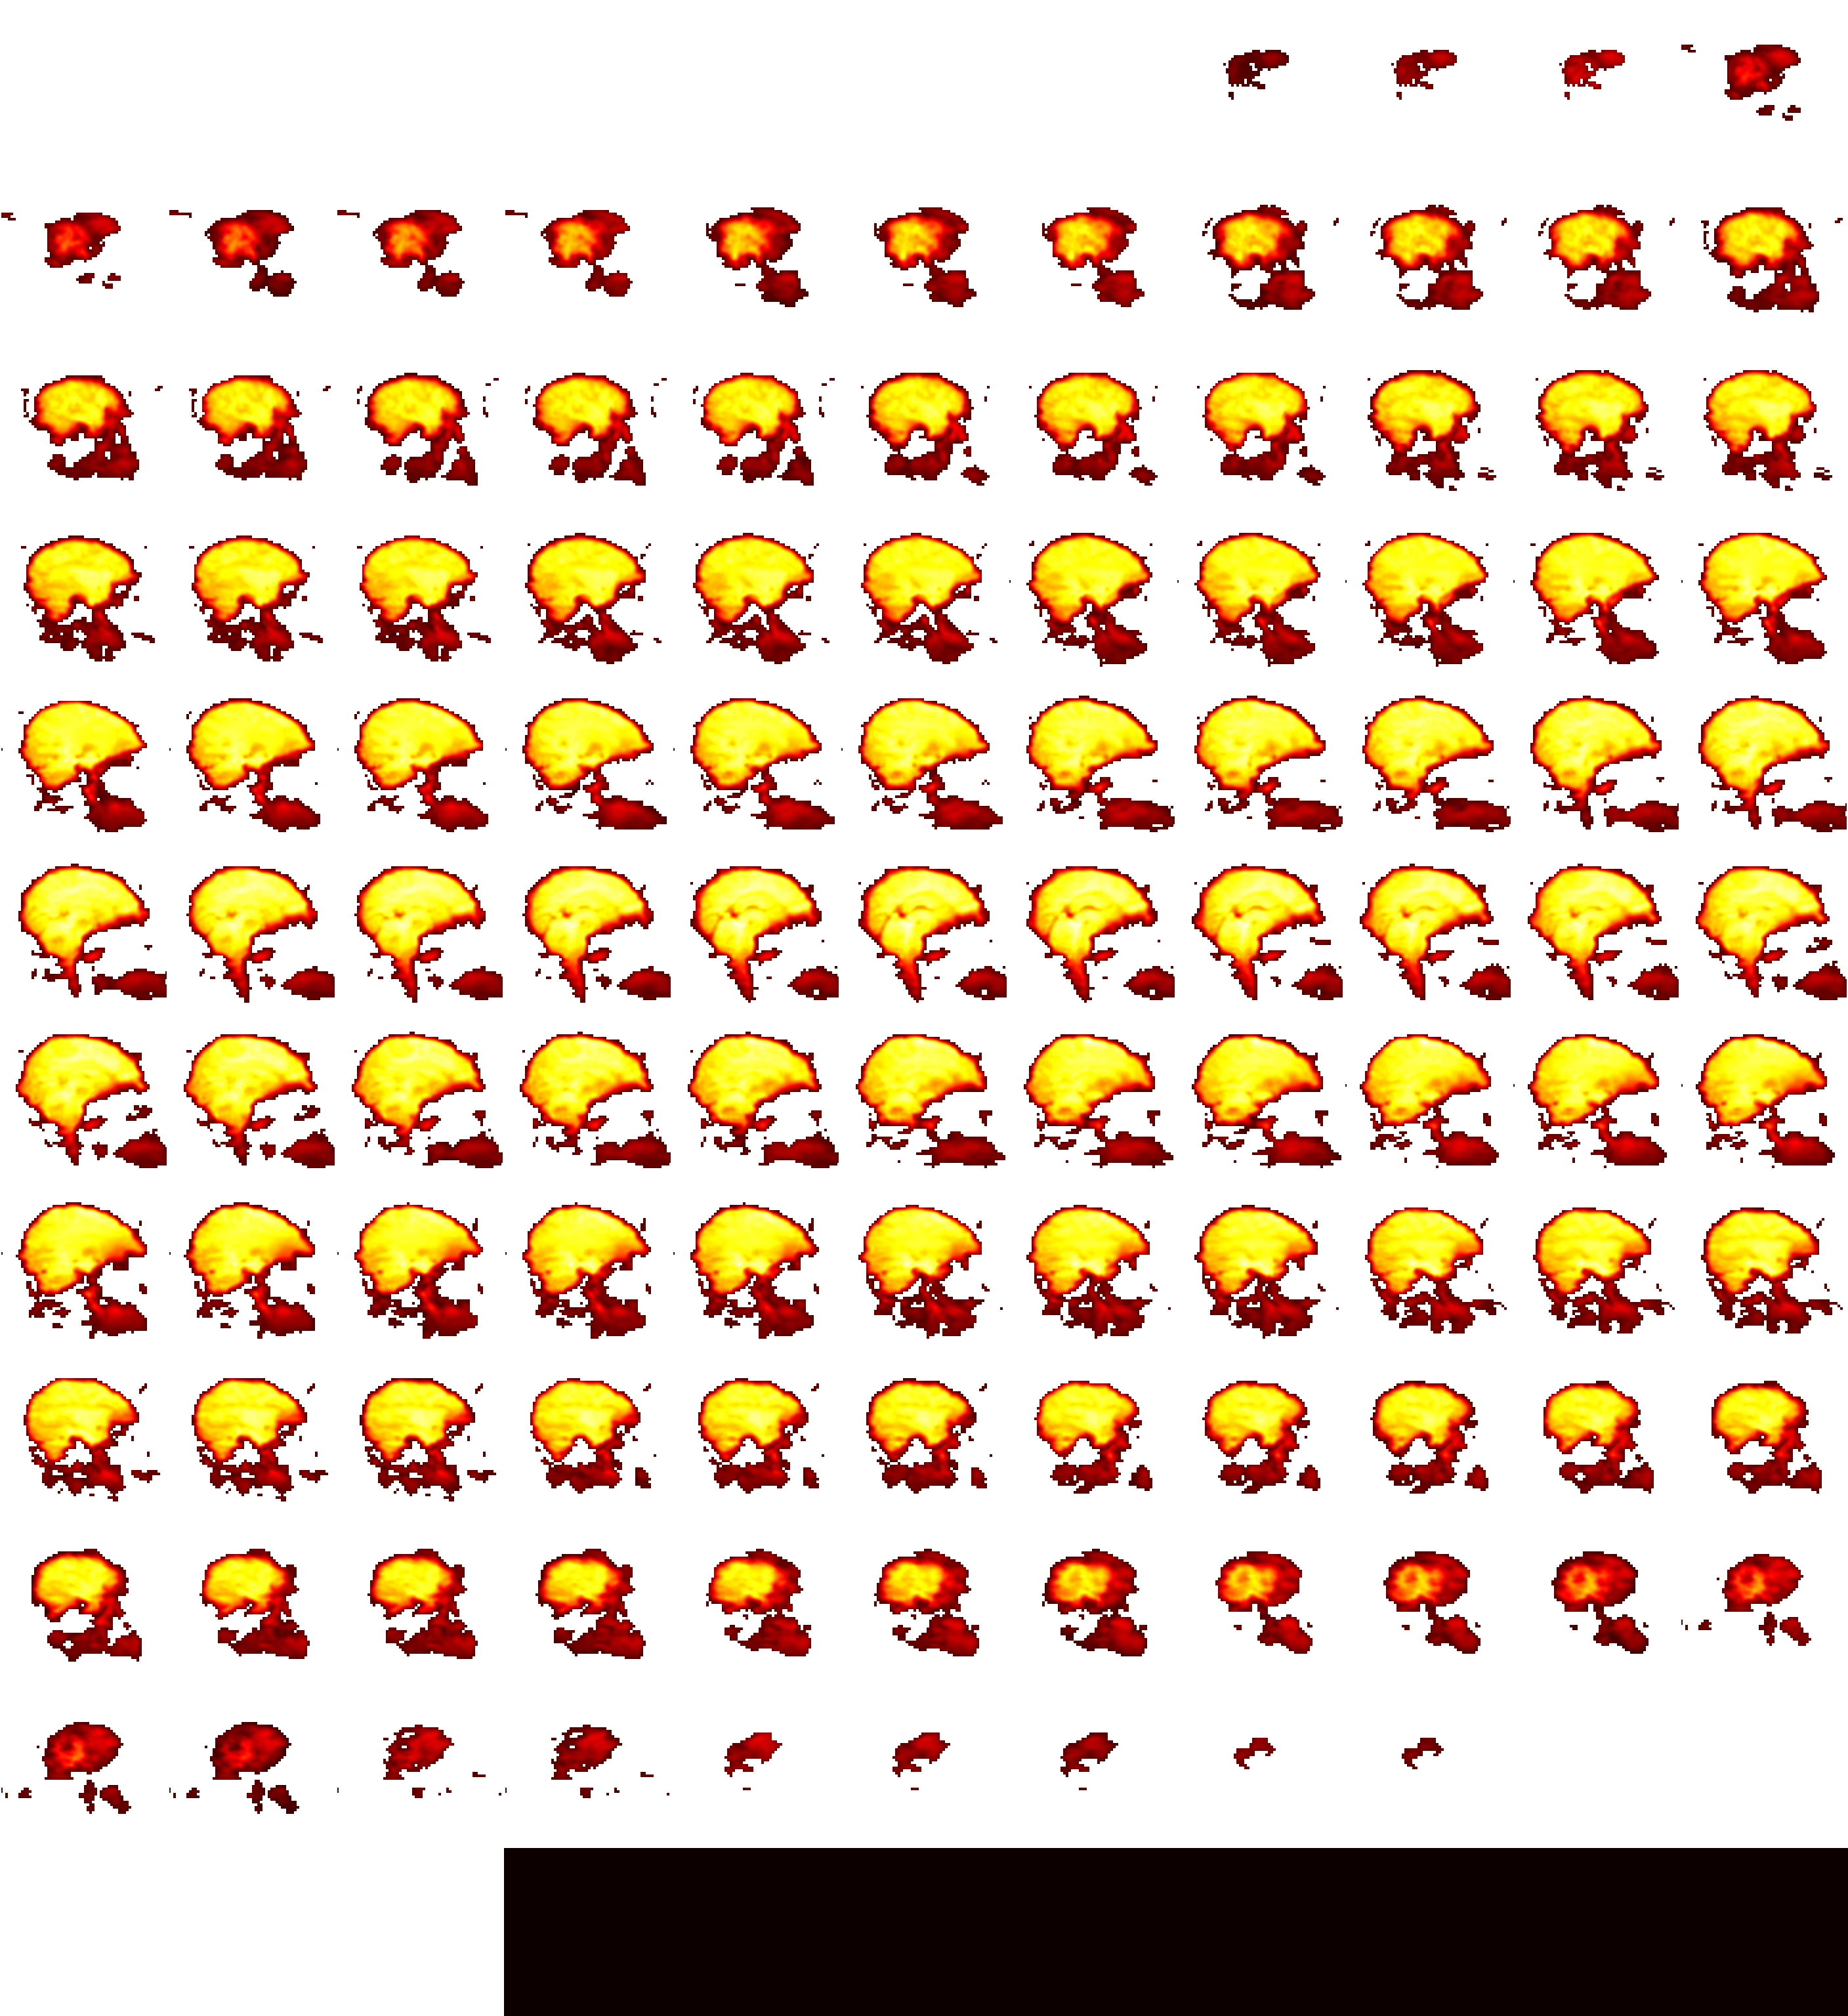

In [64]:
# we can even add our anatomical image as a background image! and add an optional threshold argument:
plotting.view_img(func_smooth, bg_img=img_anat, threshold=150)

<font color='green'>**Exercise 9:**</font> Try moving the crosshairs! 

Because our data is aligned to standard MNI152 space (an "average brain", generated by taking 152 brains and coregistering them), we can use another cool visualization feature from Nilearn: surface plots! Nilearn contains the resampling parameters (as available from the Freesurfer software package) necessary to resample volumetric images in MNI space to the corresponding "fsaverage" surface space. To do so, you can use the view_img_on_surf function, which takes a volumetric image (img) and projects it on a corresponding surface (surf).


In [185]:
plotting.view_img_on_surf(
    stat_map_img=func_smooth,
    surf_mesh='fsaverage5'
)

Check out different views of the surface by dragging it left/right/up/down with your mouse and zooming in (with the scroll wheel of your mouse or your trackpad). Also try switching hemispheres and surface type (Inflated vs. Pial) using the buttons on the bottom of the plot.

**While these interactive viewers are amazing, be careful not to open too many of them, as they need quite a bit of memory to run!**

#### 3.3 Extracting a brain mask


A common operation in fMRI analyses is masking: extracting particular voxels from the entire dataset, usually based on a binary brain mask (like you computed in the previous ToDo). Masking, at least in fMRI analyses, is often done on the spatial dimensions of 4D images. Reasons to mask your data could be, for example, to exclude non-brain voxels (like in skullstripping) or to perform confirmatory region-of-interest (ROI) analyses, or to extract one or multiple "seed regions" for connectivity analyses.

Let's compute a mask based on our 3D functional image (the mean of our functional data) and plot it:

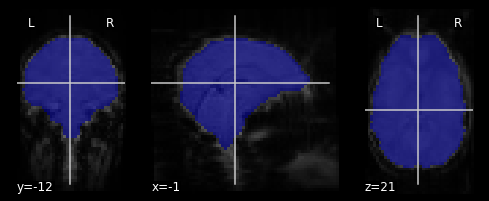

In [65]:
from nilearn.masking import compute_epi_mask
mask_img = compute_epi_mask(img_func_run1)

# Visualize it as an ROI
from nilearn.plotting import plot_roi
plot_roi(mask_img, mean_haxby_img)

#### 3.4 Applying the mask to extract the corresponding time series
These are some really lovely images, but we're also interested in the timeseries in these different voxels! To transform our Nifti images into matrices, we’ll use Nilearn's `apply_mask` to extract the fMRI data from a mask and convert it to data series. The shape of our resulting masked_data is (timepoints, voxels).

In [66]:
from nilearn.masking import apply_mask
masked_data = apply_mask(img_func_run1, mask_img)

In [67]:
print(masked_data.shape)

(121, 24134)


Let's display this time series to get an intuition of how the whole brain signal is changing over time. We can plot the first 150 timepoints from ten voxels:

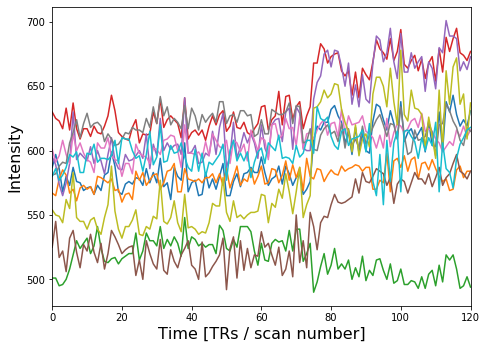

In [69]:
# And now plot a few of these
plt.figure(figsize=(7, 5))
plt.plot(masked_data[:150, :10])
plt.xlabel('Time [TRs / scan number]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
plt.xlim(0, 120)
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)

#### 3.5 Temporal processing

So we have our timeseries! Nilearn contains some basic temporal preprocessing functionality, such as detrending (removing a linear trend); standardization (normalizing the signal with mean 0 and standard deviation 1); high- and low-pass filtering; generic confound removal (using linear regression)

Again, there are different ways to perform these operations. The most "basic" ones are `signal.clean` and `image.clean_img`, which are very similar except for that `signal.clean` works on 2D numpy arrays while `image.clean_img` work on 4D "niimg-like" objects.

https://nilearn.github.io/modules/generated/nilearn.image.clean_img.html

Let's clean our data a bit. For example, we can use a highpass filter to get rid of very slow drifts: 

In [71]:
func_clean = image.clean_img(img_func_run1, runs=None, detrend=False, 
                             standardize=False, confounds=None, low_pass=None, 
                             high_pass=0.01, t_r=2.5, ensure_finite=False, 
                             mask_img=None)

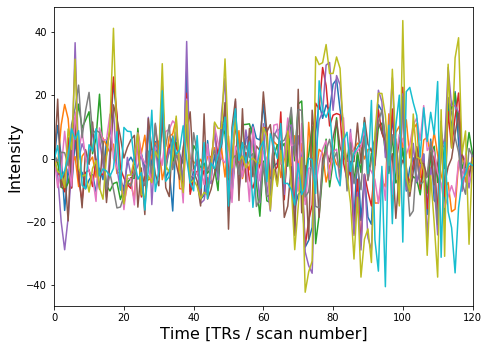

In [73]:
masked_data = apply_mask(func_clean, mask_img)
# And now plot a few of these
plt.figure(figsize=(7, 5))
plt.plot(masked_data[:150, :10])
plt.xlabel('Time [TRs / scan number]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
plt.xlim(0, 120)
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)



<font color='green'>**Exercise 10:**</font> Detrend and standardize the data and plot the results: 

In [37]:
## your code here



#### 3.5 Extracting timeseries from different ROIs

Now that we’ve seen how to create a data series from different voxels, we can start to scale up! What if, instead of wanting to extract signal from one voxel, we want to define several ROIs and extract signal from all of them? Nilearn can help us with that, too. For this, we’ll use nilearn.input_data.NiftiLabelsMasker. 

In [74]:
# First, let's load a parcellation (brain atlas) that we'd like to use
multiscale = datasets.fetch_atlas_basc_multiscale_2015(resume=True)
print('Atlas ROIs are located at: %s' % multiscale.scale064)

Atlas ROIs are located at: C:\Users\noors/nilearn_data\basc_multiscale_2015\template_cambridge_basc_multiscale_nii_sym\template_cambridge_basc_multiscale_sym_scale064.nii.gz


For different atlases see: https://nilearn.github.io/stable/modules/reference.html#atlases 

`datasets.fetch_atlas_basc_multiscale_2015` downloads and loads multiscale functional brain parcellations. The atlas includes group brain parcellations generated from resting-state functional MRI from about 200 young healthy subjects. Multiple scales are available (how many regions you want), let's have a look at the scale-36:

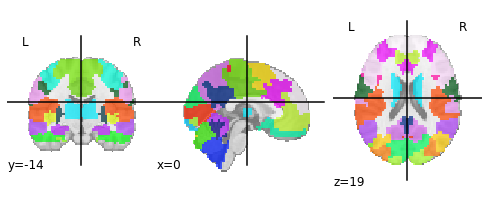

In [94]:
plotting.plot_roi(multiscale.scale036)

Okay! Using `NifitLabelsMaker` with this atlas will help us to extract the signal averaged across voxels in our different regions:

In [95]:
from nilearn.input_data import NiftiLabelsMasker, NiftiMasker
label_masker = NiftiLabelsMasker(labels_img=multiscale.scale036, standardize=True)

In [96]:
label_masker

NiftiLabelsMasker(background_label=0, detrend=False, dtype=None, high_pass=None,
                  high_variance_confounds=False, labels=None,
                  labels_img='C:\\Users\\noors/nilearn_data\\basc_multiscale_2015\\template_cambridge_basc_multiscale_nii_sym\\template_cambridge_basc_multiscale_sym_scale036.nii.gz',
                  low_pass=None, mask_img=None, memory=Memory(location=None),
                  memory_level=1, reports=True, resampling_target='data',
                  smoothing_fwhm=None, standardize=True,
                  standardize_confounds=True, strategy='mean', t_r=None,
                  verbose=0)

In [97]:
fmri_matrix = label_masker.fit_transform(func_clean)
print(fmri_matrix)

[[-0.05278766 -0.10406866 -0.03620612 ... -0.13582408 -0.07919945
  -0.02744253]
 [-0.30901355 -0.8933093   0.14828634 ... -0.87734807 -0.28654164
  -0.8035851 ]
 [ 0.0371404   0.04893397  0.31393114 ... -0.78264505 -0.10121751
  -0.22755475]
 ...
 [-1.0298033  -1.0894935  -0.7814352  ...  0.0551737  -1.5968108
  -1.2100042 ]
 [ 0.24076644 -0.57751924 -0.5904796  ... -0.14281604 -0.15984386
  -0.64288616]
 [-0.01642624 -0.16075039  0.01512828 ...  0.08554999 -0.12765974
  -0.26039195]]


In [98]:
print(fmri_matrix.shape)

(121, 36)


## 4. Connectivity analyses

Now that we have a matrix containing the timeseries for different regions of interest, we can create a connectome. A connectome is a map of the connections in the brain. Since we’re working with functional data, however, we don’t have access to actual connections. Instead, we’ll use a measure of statistical dependency to infer the (possible) presence of a connection.

Here, we’ll use Pearson’s correlation as our measure of statistical dependency and compare how all of our ROIs from our chosen parcellation relate to one another.

In [99]:
from nilearn import connectome
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')
correlation_measure

ConnectivityMeasure(cov_estimator=LedoitWolf(assume_centered=False,
                                             block_size=1000,
                                             store_precision=False),
                    discard_diagonal=False, kind='correlation',
                    vectorize=False)

In [100]:
correlation_matrix = correlation_measure.fit_transform([fmri_matrix])
correlation_matrix

array([[[1.        , 0.5605131 , 0.16701196, ..., 0.06746676,
         0.53949517, 0.19169731],
        [0.5605131 , 1.        , 0.2944787 , ..., 0.33831143,
         0.69782054, 0.62330675],
        [0.16701196, 0.2944787 , 1.        , ..., 0.19115794,
         0.49671766, 0.29088807],
        ...,
        [0.06746676, 0.33831143, 0.19115794, ..., 1.        ,
         0.39565155, 0.57501656],
        [0.53949517, 0.69782054, 0.49671766, ..., 0.39565155,
         1.        , 0.7099619 ],
        [0.19169731, 0.62330675, 0.29088807, ..., 0.57501656,
         0.7099619 , 1.        ]]], dtype=float32)

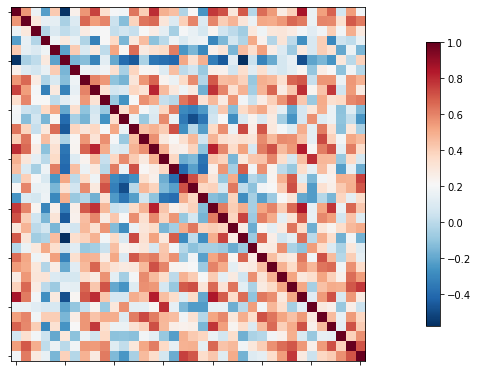

In [101]:
import numpy as np

correlation_matrix = correlation_matrix[0]
# Mask the main diagonal for visualization:
# np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix)

<font color='green'>**Exercise 11/To think:**</font> What do the X and Y axis represent?

It can also be helpful to project these connection weightings back on to the brain, to visualize these connectomes! Let's try. 

In [102]:
# find coordinates of different regions 
coords = plotting.find_parcellation_cut_coords(multiscale.scale036)

In [103]:
# interactive plotting (if it works)
view = plotting.view_connectome(correlation_matrix, node_coords = coords)

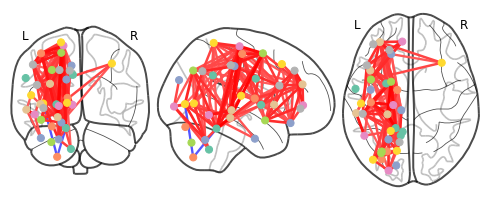

In [104]:
# plot connectome with 80% edge strength in the connectivity
plotting.plot_connectome(correlation_matrix, coords,
                         edge_threshold="80%")

<font color='orange'>**Homework assignment**</font> 

1. Plot the activity from run 2, from ten randomly chosen voxels. 

2. Extract the averaged timeseries from different regions of interest and plot the timeseries (you can use a different scale from the atlas we loaded, or use a completely different atlas) 

3. Can you write a loop that plots the averaged functional data with varying amounts of smoothing, from no smoothing to 20mm smoothing, in steps of 5mm? 

<font color='purple'>*Bonus:*</font> Can you add the amount of smoothing to the title of the plot?



In [ ]:
### your code here
    


Want to know out more? see 
- https://peerherholz.github.io/workshop_weizmann/data/image_manipulation_nilearn.html?msclkid=9d87cfd3cf8a11ecb5e0967fbfd32eb6
- https://emdupre.github.io/nha2020-nilearn/01-data-structures.html